In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# @title 전처리
import numpy as np
import pandas as pd
data_route = '/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv'  # 기사 감정 + 음원 점수
stock_data = pd.read_csv(data_route, encoding='utf-8') #euc-kr
stock_data = stock_data.sort_values(by='Date', ascending=True)
stock_data['종가'] = stock_data['종가'].str.replace(',', '').astype(float)
stock_data['시가'] = stock_data['시가'].str.replace(',', '').astype(float)
stock_data['고가'] = stock_data['고가'].str.replace(',', '').astype(float)
stock_data['저가'] = stock_data['저가'].str.replace(',', '').astype(float)
stock_data['거래량'] = stock_data['거래량'].str.replace(',', '').astype(float)
stock_data_h = stock_data[stock_data['entertain'] == '하이브'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_s = stock_data[stock_data['entertain'] == '에스엠'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_c = stock_data[stock_data['entertain'] == '큐브엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_j = stock_data[stock_data['entertain'] == 'JYP Ent.'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_y = stock_data[stock_data['entertain'] == '와이지엔터테인먼트'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_f = stock_data[stock_data['entertain'] == '에프엔씨엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터

stock_data_h

,Date,종가,시가,고가,저가,거래량,entertain,ScoreSum,ScoreCount,감정
1686,2020-12-18,162000.00000,162500.00000,164000.00000,160500.00000,162232.00000,하이브,39.00000,8,0.00000
1685,2020-12-21,158500.00000,162000.00000,162000.00000,157000.00000,161286.00000,하이브,35.00000,8,0.00000
1684,2020-12-22,154500.00000,157500.00000,158500.00000,154000.00000,166164.00000,하이브,35.00000,8,0.00000
1683,2020-12-23,153000.00000,154500.00000,158000.00000,152500.00000,149781.00000,하이브,34.00000,8,0.00000
1682,2020-12-24,158000.00000,153000.00000,158500.00000,151500.00000,132612.00000,하이브,29.00000,5,0.00000
...,...,...,...,...,...,...,...,...,...,...
1066,2023-06-26,298000.00000,299000.00000,303500.00000,296000.00000,125709.00000,하이브,98.00000,16,0.00000
1065,2023-06-27,292000.00000,298500.00000,298500.00000,285500.00000,289388.00000,하이브,101.00000,16,0.00000
1064,2023-06-28,285000.00000,294500.00000,294500.00000,284000.00000,166864.00000,하이브,102.00000,16,0.00000
1063,2023-06-29,279500.00000,284000.00000,291000.00000,278000.00000,187764.00000,하이브,101.00000,16,0.00000


In [60]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#stock_data = stock_data.drop(columns='entertain')
stock_data_h = stock_data_h.drop(columns='entertain')
stock_data_s = stock_data_s.drop(columns='entertain')
stock_data_c = stock_data_c.drop(columns='entertain')
stock_data_j = stock_data_j.drop(columns='entertain')
stock_data_y = stock_data_y.drop(columns='entertain')
stock_data_f = stock_data_f.drop(columns='entertain')

In [86]:
#회사 선택
stock_data = stock_data_j
# 시가 저장
original_open = stock_data['시가'].values

# plot에 사용할 날짜데이터 저장
dates = pd.to_datetime(stock_data['Date'])

cols = list(stock_data)[1:9]
stock_data = stock_data[cols]

print(stock_data)

# 정규화
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

               종가           시가           고가           저가           거래량  \
2689  26750.00000  27850.00000  28450.00000  26200.00000 2504469.00000   
2688  28500.00000  26900.00000  28900.00000  25650.00000 2818570.00000   
2687  28600.00000  28950.00000  29150.00000  27450.00000 1266390.00000   
2686  30050.00000  29100.00000  31200.00000  28900.00000 1936920.00000   
2685  31500.00000  30500.00000  31550.00000  29600.00000 1205217.00000   
...           ...          ...          ...          ...           ...   
1691 130000.00000 129300.00000 131400.00000 128500.00000  329926.00000   
1690 124900.00000 129300.00000 130300.00000 122300.00000  794119.00000   
1689 122600.00000 126300.00000 126500.00000 122500.00000  413691.00000   
1688 124900.00000 122300.00000 128000.00000 122300.00000  376280.00000   
1687 130800.00000 127400.00000 133600.00000 126700.00000  627590.00000   

      ScoreSum  ScoreCount      감정  
2689   8.00000           1 0.00000  
2688   7.00000           1 0.00000  


In [87]:
# @title 데이터 분할
# 데이터 분할
n_train = int(0.9*stock_data_scaled.shape[0])
print(stock_data_scaled.shape[0])
print(n_train)
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]
# print(test_dates.head(5))

pred_days = 1  # 예측 기간
seq_len = 14   # 미래 예측에 사용할 기간


trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

1003
902


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_40 (GRU)                (None, 14, 64)            14208     
                                                                 
 gru_41 (GRU)                (None, 32)                9408      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 23,649
Trainable params: 23,649
Non-trainable params: 0
_________________________________________________________________
Loaded model weights from disk


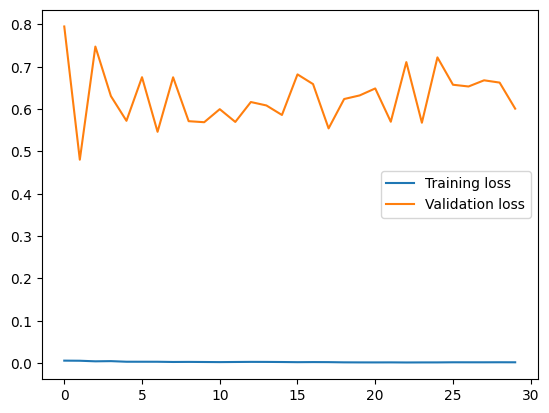

3/3 [==============================] - 1s 9ms/step
(87, 1) (87, 1)
(87,)
(87,)


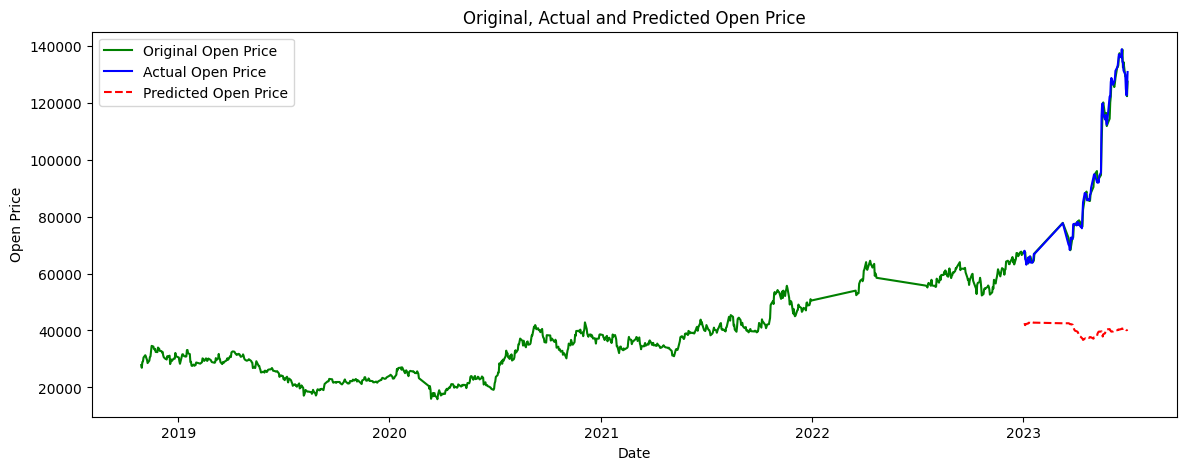

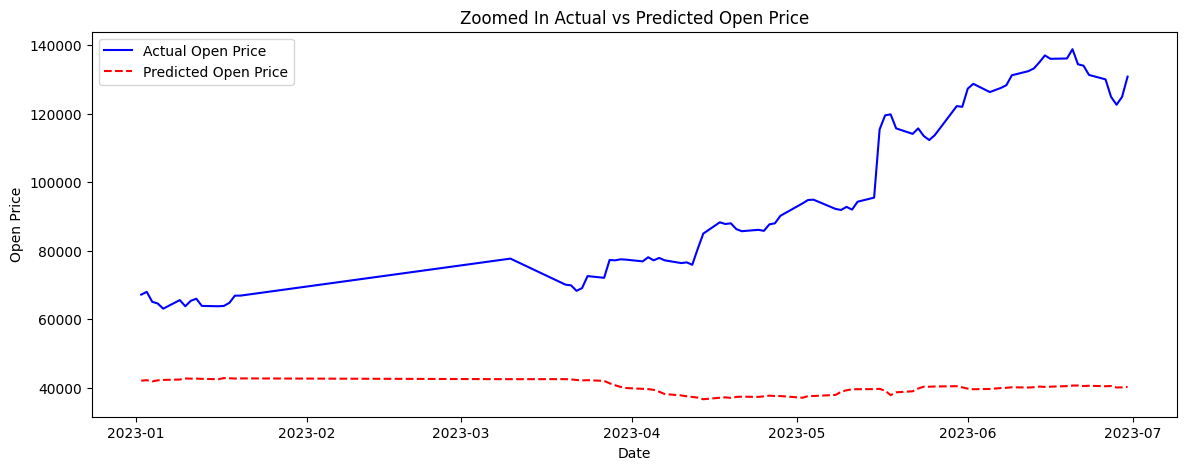

In [97]:
#####모델학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# GRU 모델
model = Sequential()
model.add(GRU(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
              return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# weight 저장 및 로드
import os

# 디렉토리 생성
save_dir = '/content/gdrive/MyDrive/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 모델 가중치 저장
model.save_weights(os.path.join(save_dir, 'gru_weights.h5'))

try:
    model.load_weights('/content/gdrive/MyDrive/gru_weights.h5')
    print("Loaded model weights from disk")

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()
except:
    print("No weights found, training model from scratch")
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # 훈련시킨 후 모델 저장
    model.save_weights('/content/gdrive/MyDrive/gru_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()


# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)


# 오리지널 시가 plot
plt.figure(figsize=(14, 5))
plt.plot(dates, original_open, color='green', label='Original Open Price')

# 실제 vs 예측
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# 확대 plot 범위 설정
zoom_start = 0
zoom_end = len(test_dates)

# 확대 plot
plt.figure(figsize=(14, 5))
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[seq_len:],
         testY_original,
         color='blue',
         label='Actual Open Price')
plt.plot(test_dates[seq_len:],
         y_pred,
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_46 (GRU)                (None, 14, 64)            14208     
                                                                 
 gru_47 (GRU)                (None, 32)                9408      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 23,649
Trainable params: 23,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25/25 [==============================] - 8s 53ms/step - loss: 0.1054 - val_loss: 0.0128
Epoch 2/30
25/25 [==============================] - 1s 22ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 3/30
25/25 [==============================] - 1s 22ms/step - loss: 0.0039 - val_loss: 0.0110
Epoch 4/30
25/25

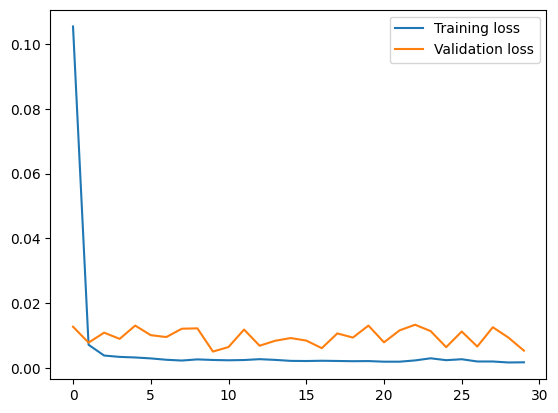

3/3 [==============================] - 1s 8ms/step
(87, 1) (87, 1)
(87,)
(87,)


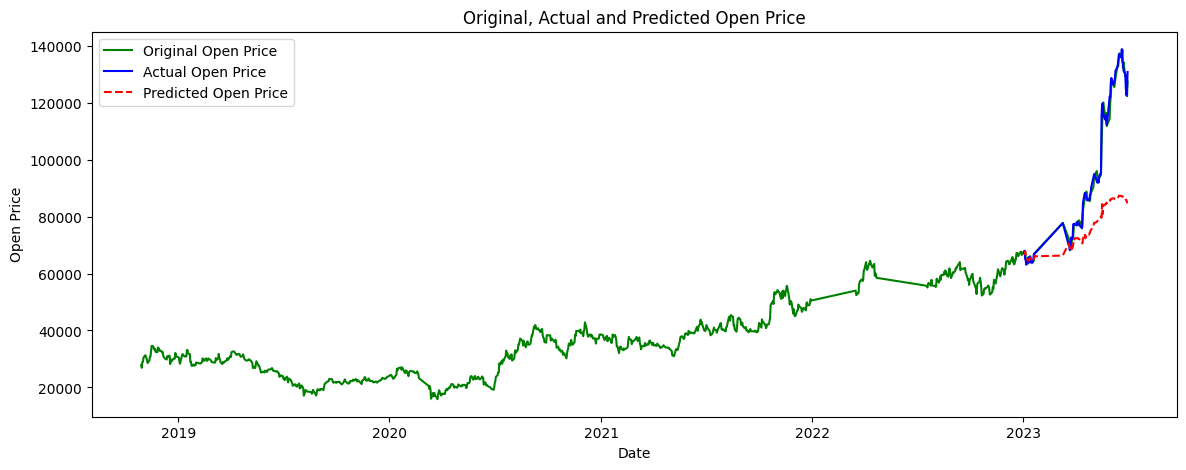

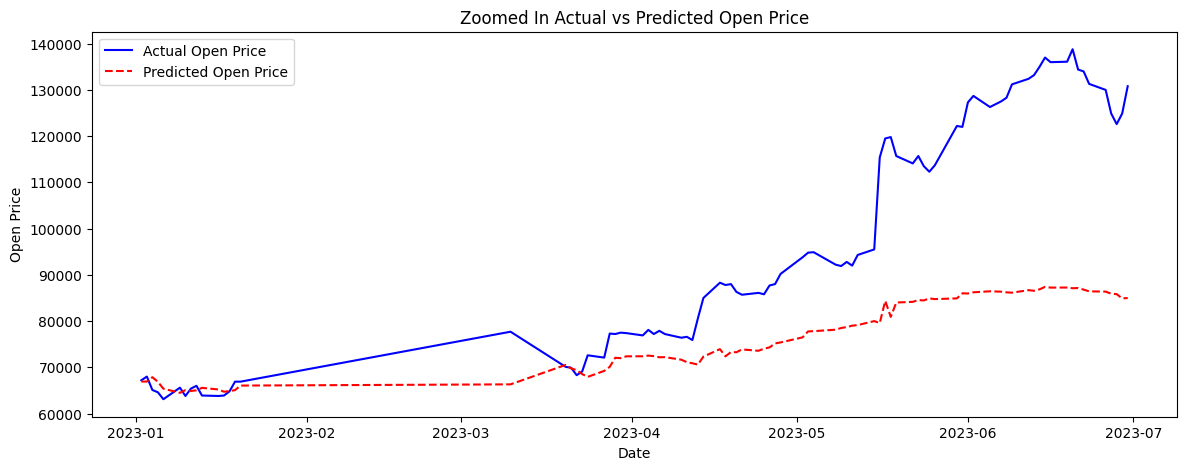

In [105]:
#####모델학습_연습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# GRU 모델
model = Sequential()
model.add(GRU(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
              return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-7  # 작은 상수
decay = 0.0  # 학습률 감소 비율

optimizer = Adam(
    learning_rate=learning_rate,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon
)

model.compile(optimizer=optimizer, loss='mse')

# weight 저장 및 로드
import os

# 디렉토리 생성
save_dir = '/content/gdrive/MyDrive/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 모델 가중치 저장
model.save_weights(os.path.join(save_dir, 'gru_weights.h5'))



history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
#훈련시킨 후 모델 저장
model.save_weights('/content/gdrive/MyDrive/gru_weights.h5')

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)


# 오리지널 시가 plot
plt.figure(figsize=(14, 5))
plt.plot(dates, original_open, color='green', label='Original Open Price')

# 실제 vs 예측
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# 확대 plot 범위 설정
zoom_start = 0
zoom_end = len(test_dates)

# 확대 plot
plt.figure(figsize=(14, 5))
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[seq_len:],
         testY_original,
         color='blue',
         label='Actual Open Price')
plt.plot(test_dates[seq_len:],
         y_pred,
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()

In [108]:
# @title 성능 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(testY_original, y_pred):
  MAE = mean_absolute_error(testY_original, y_pred)
  RMSE = np.sqrt(mean_squared_error(testY_original, y_pred))
  MSLE = mean_squared_log_error(testY_original, y_pred)
  RMSLE = np.sqrt(mean_squared_log_error(testY_original, y_pred))
  R2 = r2_score(testY_original, y_pred)

  pd.options.display.float_format = '{:.5f}'.format
  Result = pd.DataFrame(data=[MAE, RMSE, RMSLE, R2],
                        index = ['MAE', 'RMSE', 'RMSLE', 'R2'],
                        columns=['Results'])
  return Result


In [109]:
result = confirm_result(testY_original, y_pred)
result

,Results
MAE,19484.78000
RMSE,25988.76851
RMSLE,0.25289
R2,-0.07046
